<a href="https://colab.research.google.com/github/ssvakil/Machine-Learning-in-Python-Workshop/blob/master/Keras_Stable_Diffusion_%5BGPU%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Keras Stable Diffusion: GPU starter example

## Install GPU requirements

In [1]:
!pip install git+https://github.com/fchollet/stable-diffusion-tensorflow --upgrade --quiet
!pip install tensorflow tensorflow_addons ftfy --upgrade --quiet
!apt install --allow-change-held-packages libcudnn8=8.1.0.77-1+cuda11.2

     |████████████████████████████████| 588.3 MB 22 kB/s 
     |████████████████████████████████| 1.1 MB 55.3 MB/s 
     |████████████████████████████████| 53 kB 1.9 MB/s 
     |████████████████████████████████| 1.7 MB 59.6 MB/s 
     |████████████████████████████████| 6.0 MB 61.2 MB/s 
     |████████████████████████████████| 439 kB 64.9 MB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following packages will be REMOVED:
  libcudnn8-dev
The following held packages will be changed:
  libcudnn8
The following packages will be DOWNGRADED:
  libcudnn8
0 upgraded, 0 newly installed, 1 downgraded, 1 to remove and 18 not upgraded.
Need to get 430 MB of archives.
After this operation, 1,392 MB disk space will be freed.
Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  libcud

## Let's instantiate a Text2Image generator and make a first image

The first run has a bit of extra compilation overhead.

1356917/1356917 [==============================] - 0s 0us/step


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


198152112/198152112 [==============================] - 2s 0us/step


  0   1: 100%|██████████| 50/50 [01:13<00:00,  1.48s/it]


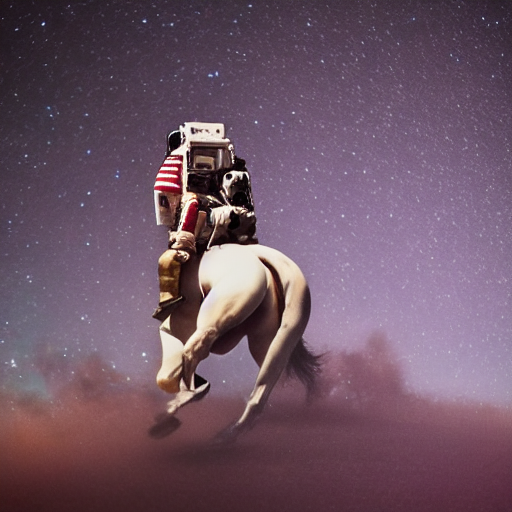

In [2]:
from stable_diffusion_tf.stable_diffusion import Text2Image
from PIL import Image

generator = Text2Image( 
    img_height=512,
    img_width=512,
    jit_compile=False,  # You can try True as well (different performance profile)
)
img = generator.generate(
    "DSLR photograph of an astronaut riding a horse",
    num_steps=50,
    unconditional_guidance_scale=7.5,
    temperature=1,
    batch_size=1,
)
pil_img = Image.fromarray(img[0])
display(pil_img)

## We can keep making more images with the same generator

You only have to go through compilation once -- all subsequent runs are faster.

  0   1: 100%|██████████| 50/50 [00:55<00:00,  1.12s/it]


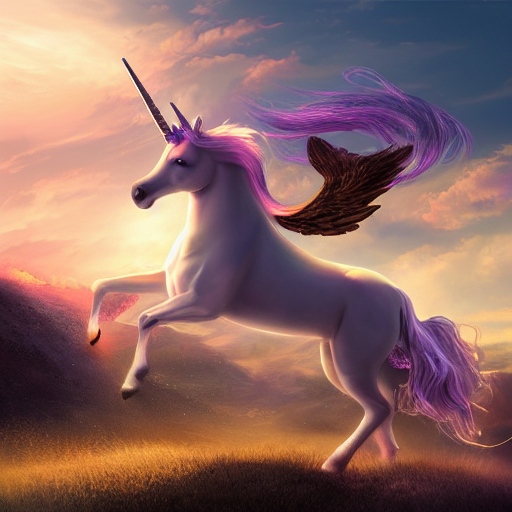

In [3]:
img = generator.generate(
    "An epic unicorn riding in the sunset, artstation concept art",
    num_steps=50,
    unconditional_guidance_scale=7.5,
    temperature=1,
)
pil_img = Image.fromarray(img[0])
display(pil_img)

## Let's try batched generation

  0   1: 100%|██████████| 50/50 [02:56<00:00,  3.53s/it]


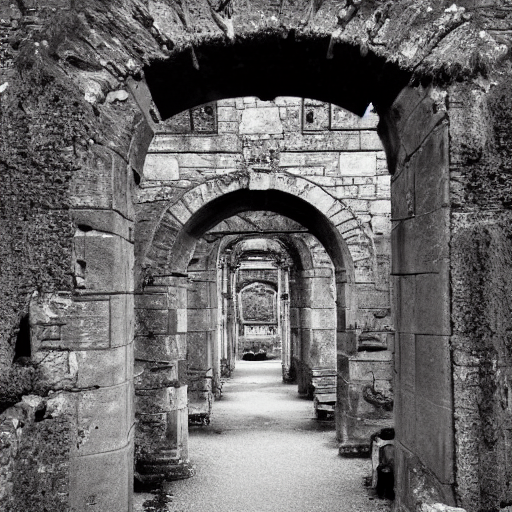

In [4]:
img = generator.generate(
    "Ruins of a castle in Scotland",
    num_steps=50,
    unconditional_guidance_scale=7.5,
    temperature=1,
    batch_size=4,
)
pil_img = Image.fromarray(img[0])
display(pil_img)

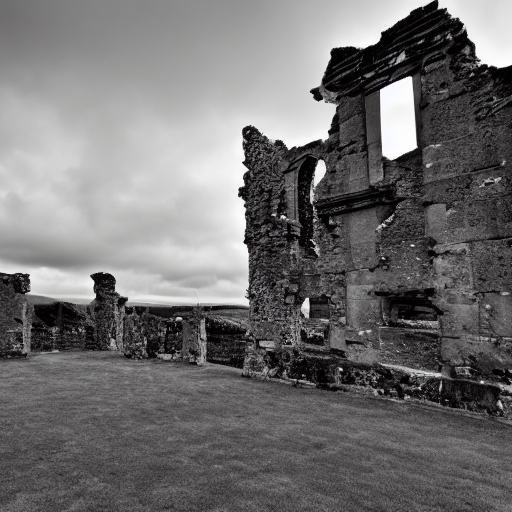

In [5]:
pil_img = Image.fromarray(img[1])
display(pil_img)

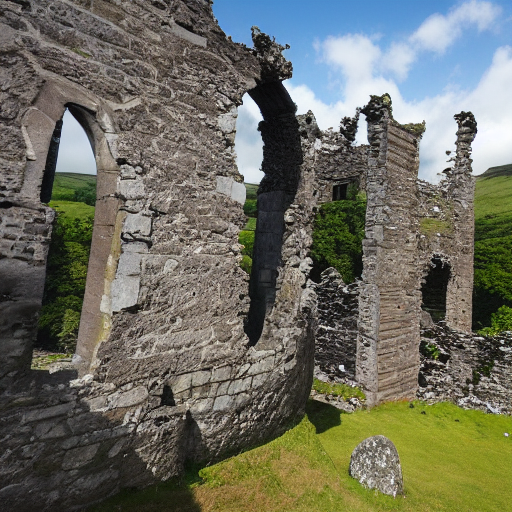

In [6]:
pil_img = Image.fromarray(img[2])
display(pil_img)

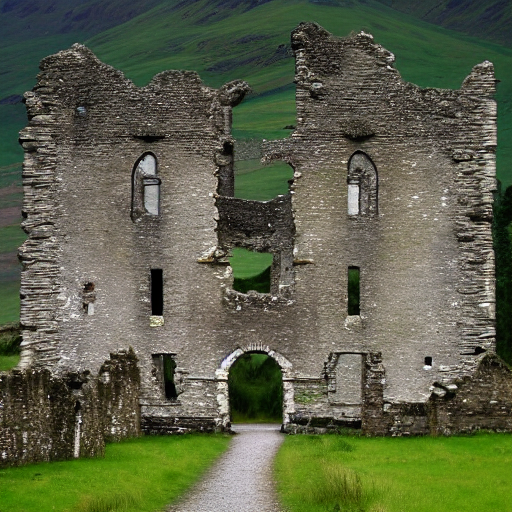

In [7]:
pil_img = Image.fromarray(img[3])
display(pil_img)